# Import Required Libraries

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb
import shap
import optuna
from optuna import Trial
from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score

In [78]:
data = pd.read_csv("train.csv")
data.head(2)
# test_data= pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
# # test_data.head(2)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


## Data Analysis

In [79]:
data.shape

(165034, 14)

In [80]:
data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [82]:
data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [83]:
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [84]:
data['Surname'].value_counts()

Surname
Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: count, Length: 2797, dtype: int64

In [85]:
data['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [86]:
data['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

#### Dropping the columns that I feel are not required

##### id
##### CustomerId
##### Surname

In [87]:
data.head(2)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


In [88]:
data.drop(["id", "CustomerId", "Surname"], axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


## DATA Plotting

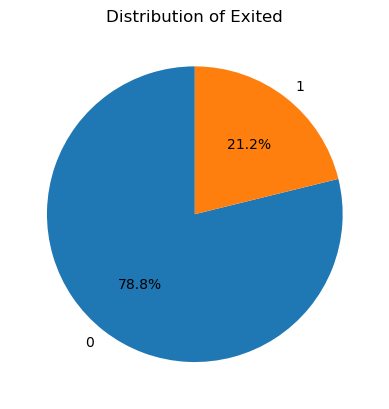

In [89]:
plt.pie(data['Exited'].value_counts().values, labels=np.unique(data['Exited']), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Exited')
plt.show()

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

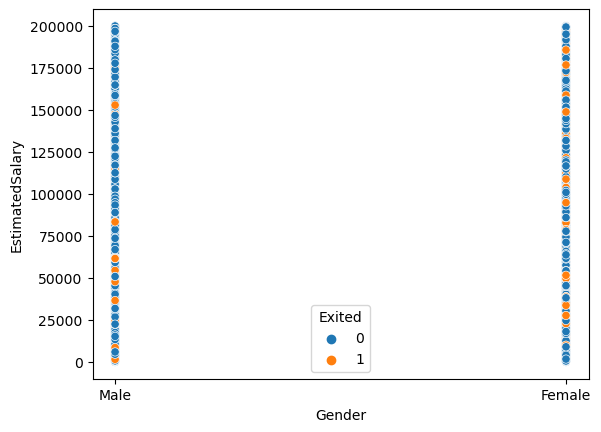

In [90]:
sns.scatterplot(x='Gender',y='EstimatedSalary',data=data,hue='Exited')

In [91]:
data.head(2)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


In [92]:
# Based on description of dataset, can define the list of categorical variables (include binaries)
categorical_variables = ['id', 'CustomerId', 'Surname', "CreditScore",
                         'Geography', "Gender", 'Age',
                         'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                         'IsActiveMember', 'EstimatedSalary'
                        ]

# Get remaining numeric variables but remove target
numeric_variables = [col for col in data.columns if col not in categorical_variables]
numeric_variables.remove('Exited')

variables = numeric_variables + categorical_variables

def plot_distributions(data, columns, target_variable):

    # Determine the number of subplots required
    num_columns = len(variables)
    num_subplots = math.ceil(num_columns / 2)

    # Create subplots
    fig, axes = plt.subplots(num_subplots, 2, figsize=(12, 4 * num_subplots))
    axes = axes.flatten()

    # Plot distribution plots for each numeric column
    for i in range(num_columns):
        sns.histplot(data=data, x=columns[i], hue=target_variable, stat='percent', common_norm=False, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {columns[i]}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

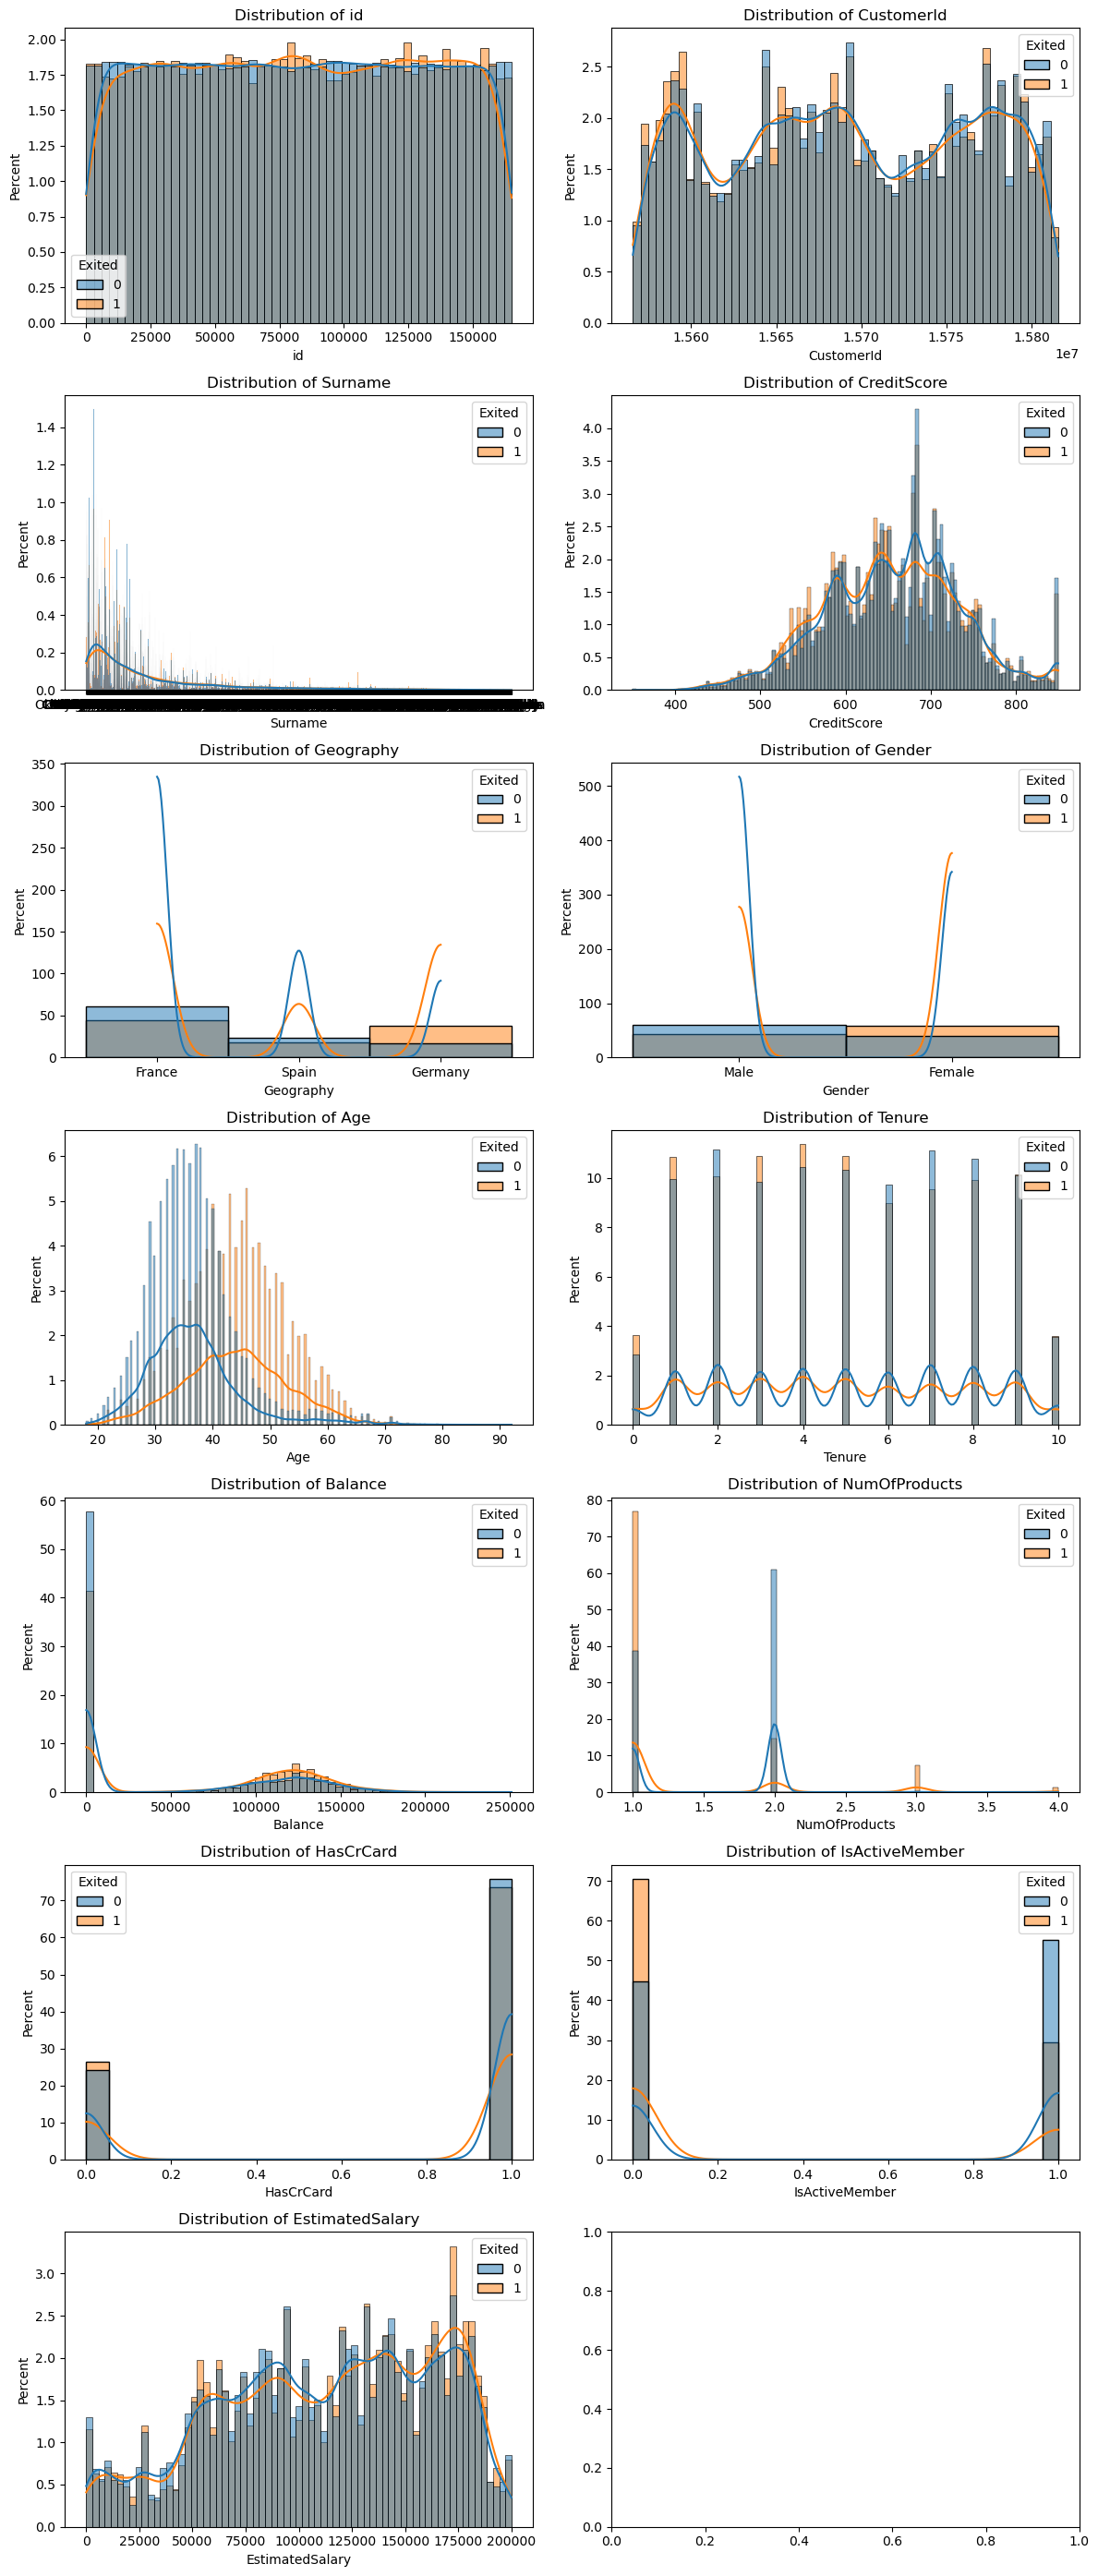

In [93]:
plot_distributions(data, variables, 'Exited')

In [94]:
data = data.drop(["id", "CustomerId", "Surname"], axis=1)

In [95]:
# Converting categorical variables of the dataset into numerical variables - using ONE HOT ENCODING technique
data['Geography'] = data['Geography'].apply({'France': 0, 'Spain': 1, 'Germany':2}.get)
data['Gender'] = data['Gender'].apply({'Male': 0, 'Female': 1}.get)

In [96]:
data.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.004993,-0.002310,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Geography,0.004993,1.000000,0.036011,0.087808,-0.005730,0.476537,-0.090753,-0.012241,-0.029360,0.007994,0.186849
Gender,-0.002310,0.036011,1.000000,0.063139,-0.008767,0.014699,-0.026098,-0.006418,-0.033722,0.007778,0.146442
Age,-0.008918,0.087808,0.063139,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,0.000942,-0.005730,-0.008767,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,0.006973,0.476537,0.014699,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,0.011361,-0.090753,-0.026098,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.002828,-0.012241,-0.006418,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,0.014790,-0.029360,-0.033722,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237
EstimatedSalary,-0.001820,0.007994,0.007778,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827


<Axes: >

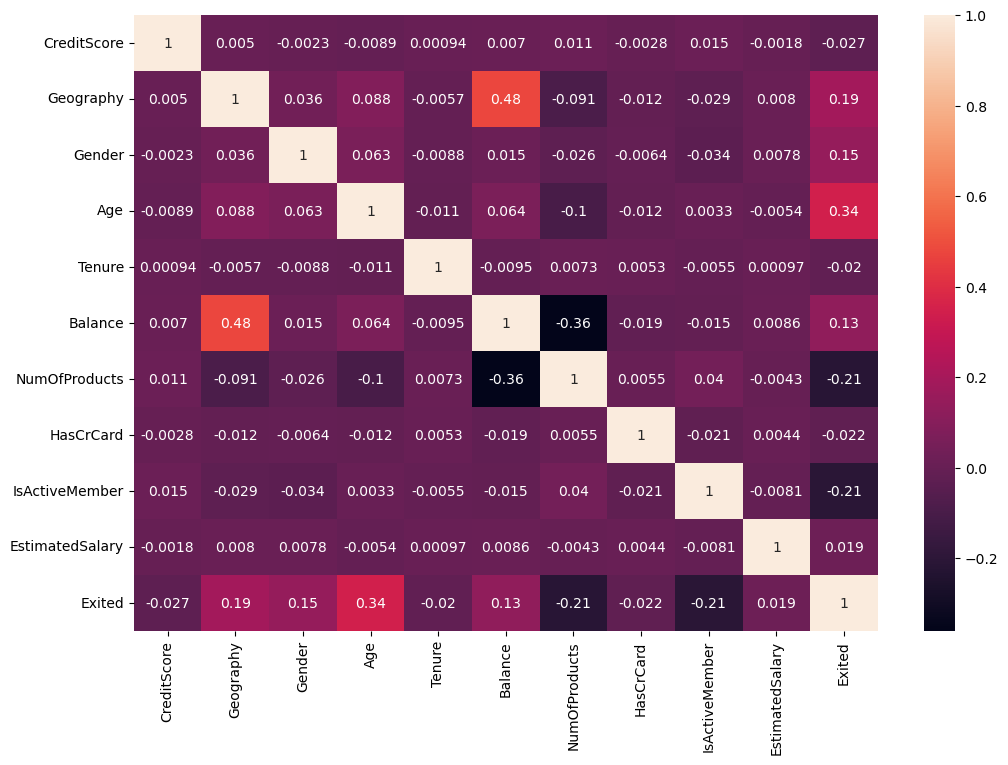

In [97]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

## Dividing the dataset into dependent and independent columns

In [98]:
X= data.drop('Exited',axis=1)
y=data['Exited']
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,0,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0,0,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0,0,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,1,0,33.0,5,0.00,2,1.0,1.0,15068.83


In [99]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

## Splitting the dataset into training and testing set
### 20% of the dataset will be used for testing(evaluation) and 80% of the data will be used for training purposes

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [101]:
def baseline_classification_models(X_train, y_train, X_test, y_test, random_state=101):
    """
    Fits and scores baseline binary classification models, and plots a bar chart with F1 scores.
    """
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=random_state),
        'knn': KNeighborsClassifier(),
        'svc': SVC(random_state=random_state, class_weight='balanced'),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Random Forest': RandomForestClassifier(n_estimators=10, random_state=random_state),
        'XGB Classifier': xgb.XGBClassifier(random_state=random_state),
        'ada_boost_model': AdaBoostClassifier(n_estimators=15, random_state=random_state),
        'gradient_model': GradientBoostingClassifier(random_state=random_state),
        'CatBoost': CatBoostClassifier(logging_level='Silent', random_state=random_state)
    }

    num_models = len(models)
    colors = plt.cm.viridis(np.linspace(0, 1, num_models))

    # Fit and score each model
    
    # Fit and score each model
    f1_scores = {}
    for model_name, model in models.items():
        model.fit(scaled_X_train, y_train)
        if model_name == 'XGB Classifier':
            print(model.get_xgb_params())
        y_pred = model.predict(scaled_X_test)
    
        # Update this line to handle multiclass F1 score
        f1 = f1_score(y_test, y_pred, average='weighted')  
        f1_scores[model_name] = f1
        print(f"{model_name} - F1 Score: {f1}")

    # Plot the bar chart
    plt.bar(f1_scores.keys(), f1_scores.values(), color=colors)
    plt.xlabel('Models')
    plt.ylabel('F1 Score')
    plt.title('Baseline Binary Classification Models Performance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()  # Added this line to display the plot

Logistic Regression - F1 Score: 0.8122114212029337
knn - F1 Score: 0.8411988975476343
svc - F1 Score: 0.8181178143854404
Decision Tree - F1 Score: 0.7976669013390001
Random Forest - F1 Score: 0.8440748672404009
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 101, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
XGB Classifier - F1 Score: 0.8578620270978523
ada_boost

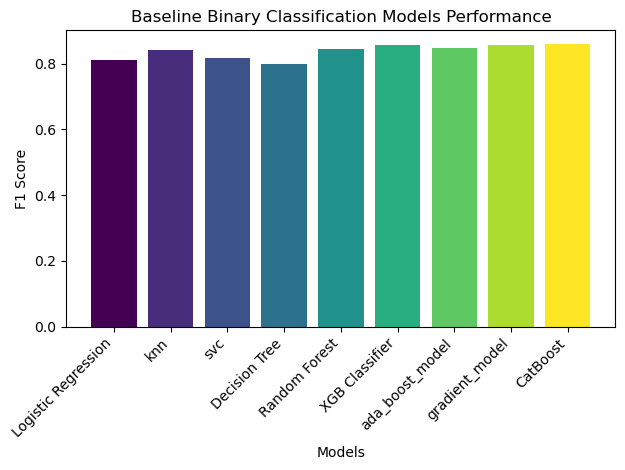

In [102]:
from sklearn.linear_model import LogisticRegression
baseline_classification_models(scaled_X_train, y_train, scaled_X_test, y_test)

## Logistic Regression

In [103]:
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train, y_train)
log_pred = log_model.predict(scaled_X_test)
log_cm = confusion_matrix(y_test, log_pred)
log_ac = accuracy_score(y_test, log_pred)
rounded_log_ac = np.round(float(log_ac), 2)
print(f"Accuracy: {rounded_log_ac * 100}")
# print("Confusion Matrix {0}".format(log_conf))
print("Confusion Matrix: ")
print(log_cm)

Accuracy: 83.0
Confusion Matrix: 
[[31084  1411]
 [ 5493  3271]]


### Report back your search's optimal parameters, specifically the C value

In [104]:
log_model.C_

array([2.7825594])

In [105]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [106]:
log_model.coef_

array([[-0.0669316 ,  0.39723633,  0.33686021,  0.83242757, -0.04455527,
        -0.04327977, -0.48386907, -0.0650583 , -0.64187571,  0.04421444]])

### Model Performance Evaluation

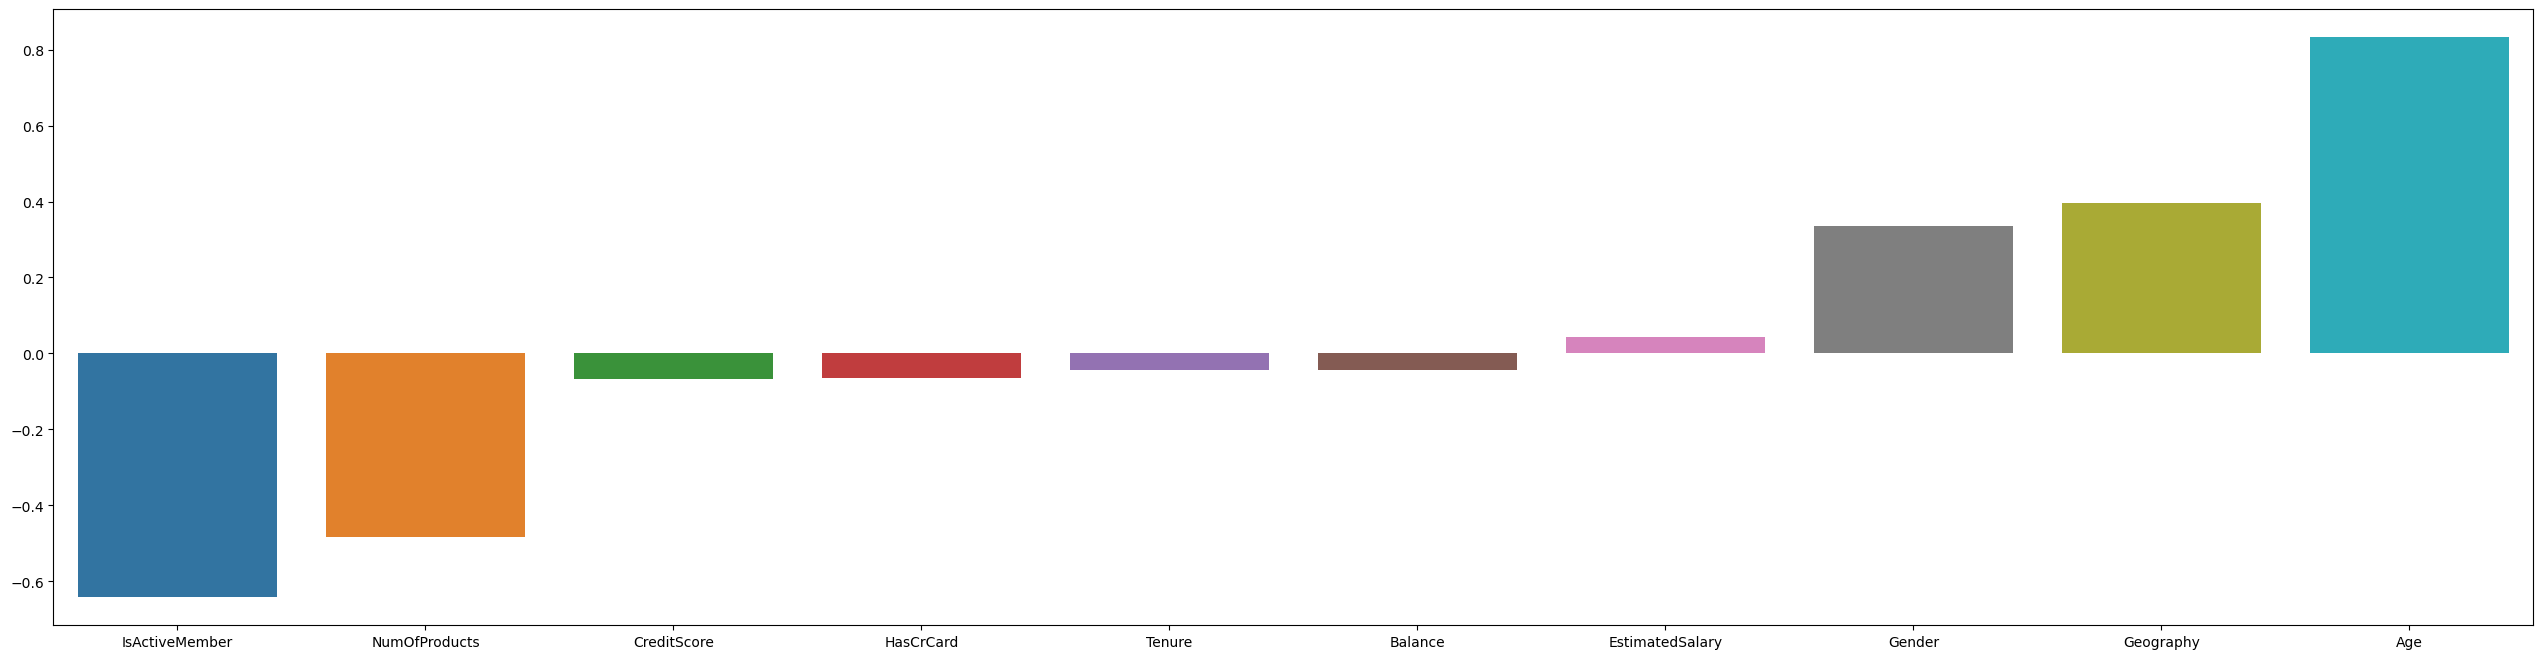

In [107]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(32,8))
sns.barplot(x=coefs.index,y=coefs.values);

In [108]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
y_pred = log_model.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[31084  1411]
 [ 5493  3271]]
0.8326668120894835


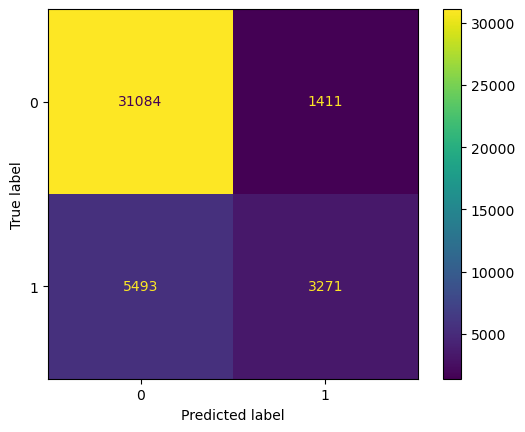

In [109]:
cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     32495
           1       0.70      0.37      0.49      8764

    accuracy                           0.83     41259
   macro avg       0.77      0.66      0.69     41259
weighted avg       0.82      0.83      0.81     41259



### Performance Curves

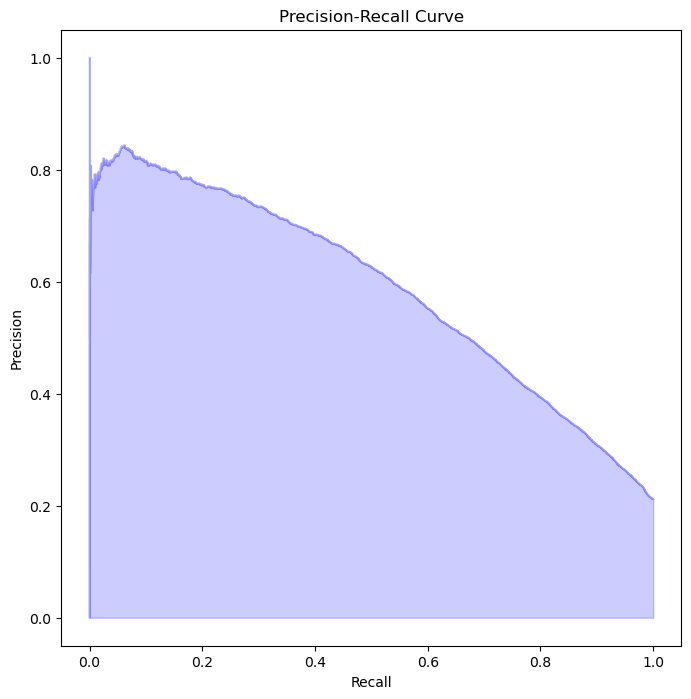

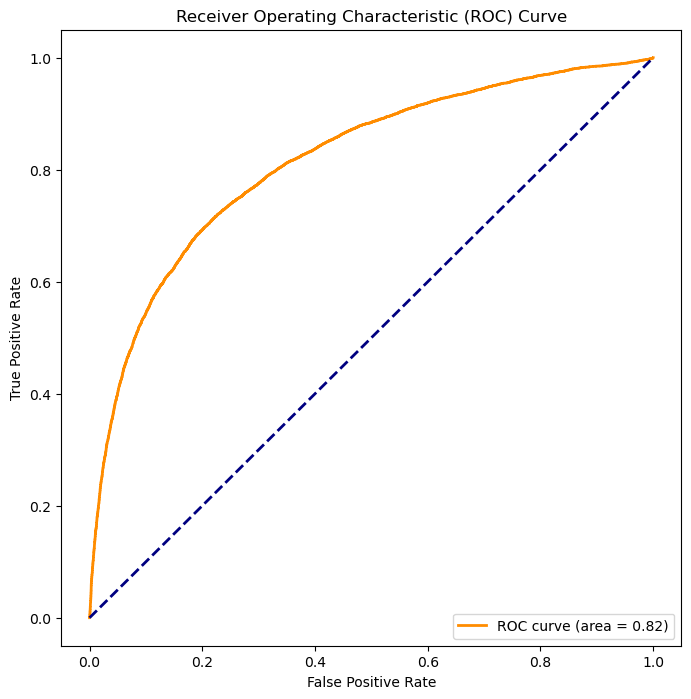

In [111]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming log_model, scaled_X_test, and y_test are defined

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, log_model.predict_proba(scaled_X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(scaled_X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## KNN

In [112]:
knn = KNeighborsClassifier()
operations = [('scaler', scaler), ('knn', knn)]
pipe = Pipeline(operations)
k_values = list(range(1, 10))
knn_param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe, knn_param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(scaled_X_train, y_train)
full_cv_classifier.best_estimator_.get_params()
knn_pred = full_cv_classifier.predict(scaled_X_test)
knn_cm = confusion_matrix(y_test, knn_pred)
knn_ac = accuracy_score(y_test, knn_pred)
rounded_knn_ac = np.round(float(knn_ac), 2)
print(f"Accuracy: {rounded_knn_ac * 100}")
print("Confusion Matrix: ")
print(knn_cm)

Accuracy: 85.0
Confusion Matrix: 
[[30602  1893]
 [ 4090  4674]]


### Model Performance Evaluation

Confusion Matrix:
[[30602  1893]
 [ 4090  4674]]


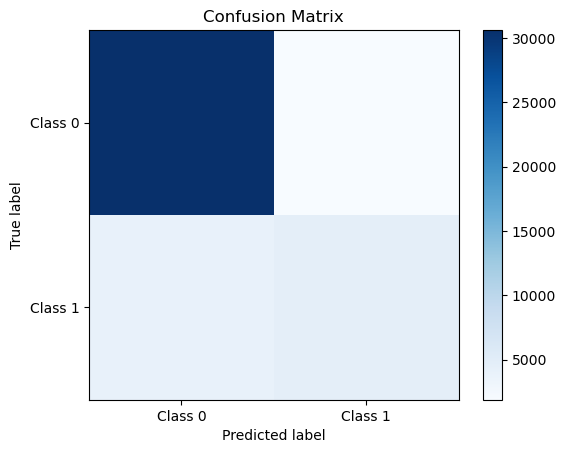

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     32495
           1       0.71      0.53      0.61      8764

    accuracy                           0.85     41259
   macro avg       0.80      0.74      0.76     41259
weighted avg       0.85      0.85      0.85     41259



In [113]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming you have trained the classifier (full_cv_classifier) and scaled your test data (scaled_X_test)

# Make predictions
y_pred = full_cv_classifier.predict(scaled_X_test)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix using matplotlib
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

classes = ["Class 0", "Class 1"]  # Adjust class names if needed
tick_marks = [0, 1]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Performance Curve

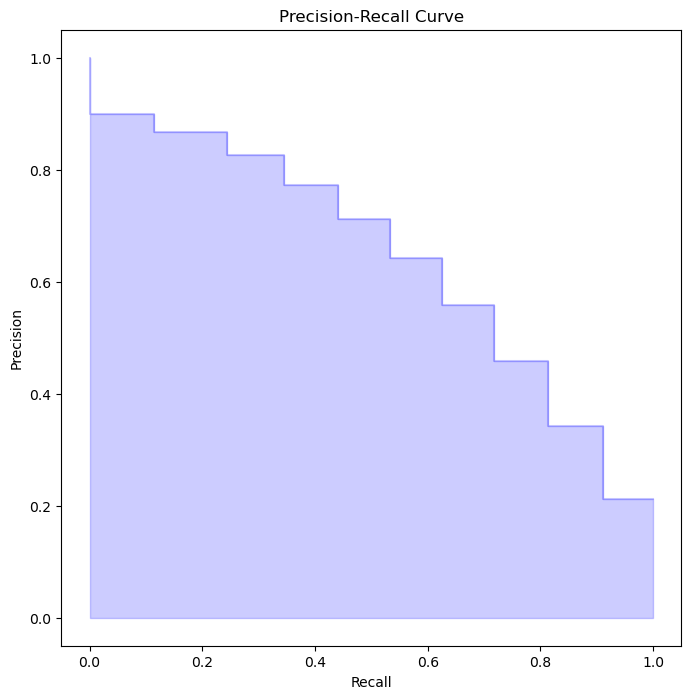

In [114]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming log_model, scaled_X_test, and y_test are defined

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, full_cv_classifier.predict_proba(scaled_X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

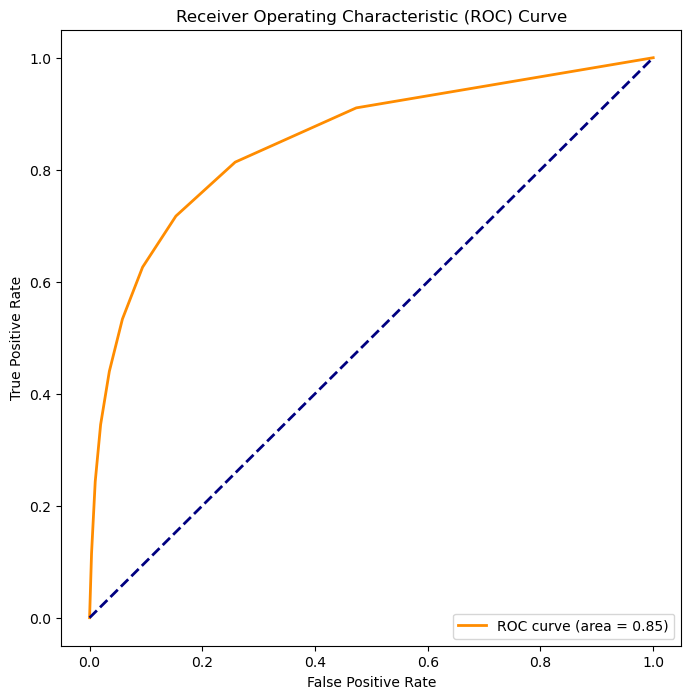

In [115]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, full_cv_classifier.predict_proba(scaled_X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Support Vector Machine

In [116]:
# svc = SVC(class_weight='balanced')
# svc_param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto']}
# svc_grid = GridSearchCV(svc, svc_param_grid)
# svc_grid.fit(scaled_X_train, y_train)
# svc_grid_pred = svc_grid.predict(scaled_X_test)
# svc_cm = confusion_matrix(y_test, svc_grid_pred)
# svc_ac = accuracy_score(y_test, svc_grid_pred)
# rounded_svc_ac = np.round(float(svc_ac), 2)
# print(f"Accuracy: {rounded_svc_ac * 100}")
# print("Confusion Matrix: ")
# print(svc_cm)

## Decision Tree

In [117]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(scaled_X_train, y_train)
decision_tree_pred = decision_tree_model.predict(scaled_X_test)
dt_cm = confusion_matrix(y_test, decision_tree_pred)
dt_ac = accuracy_score(y_test, decision_tree_pred)
rounded_dt_ac = np.round(float(dt_ac), 2)
print(f"Accuracy: {rounded_dt_ac * 100}")
print("Confusion Matrix: ")
print(dt_cm)

Accuracy: 80.0
Confusion Matrix: 
[[28076  4419]
 [ 4027  4737]]


## Random Forest Machine

In [118]:
# Use 10 random trees
Random_Forest_model = RandomForestClassifier(n_estimators=10, random_state=101)
Random_Forest_model.fit(scaled_X_train, y_train)
Random_Forest_preds = Random_Forest_model.predict(scaled_X_test)
rf_cm = confusion_matrix(y_test, Random_Forest_preds)
rf_ac = accuracy_score(y_test, Random_Forest_preds)
rounded_rf_ac = np.round(float(rf_ac), 2)
print(f"Accuracy: {rounded_rf_ac * 100}")
print("Confusion Matrix: ")
print(rf_cm)

Accuracy: 85.0
Confusion Matrix: 
[[30729  1766]
 [ 4275  4489]]


## Boosting - Ada Boost

In [119]:
ada_boost_model = AdaBoostClassifier(n_estimators=15)
ada_boost_model.fit(scaled_X_train, y_train)
ada_boost_preds = ada_boost_model.predict(scaled_X_test)
adb_cm = confusion_matrix(y_test, ada_boost_preds)
adb_ac = accuracy_score(y_test, ada_boost_preds)
rounded_adb_ac = np.round(float(adb_ac), 2)
print(f"Accuracy: {rounded_adb_ac * 100}")
print("Confusion Matrix: ")
print(adb_cm)

Accuracy: 86.0
Confusion Matrix: 
[[30978  1517]
 [ 4306  4458]]


## Boosting - Gradient Boost

In [120]:
gb_model = GradientBoostingClassifier()
gb_param_grid = {"n_estimators": [1, 5, 10], 'max_depth': [3, 4, 5, 6]}
gb_grid = GridSearchCV(gb_model, gb_param_grid)
gb_grid.fit(scaled_X_train, y_train)
gb_predictions = gb_grid.predict(scaled_X_test)
gb_cm = confusion_matrix(y_test, gb_predictions)
gb_ac = accuracy_score(y_test, gb_predictions)
rounded_gb_ac = np.round(float(gb_ac), 2)
print(f"Accuracy: {rounded_gb_ac * 100}")
print("Confusion Matrix: ")
print(gb_cm)

Accuracy: 86.0
Confusion Matrix: 
[[31802   693]
 [ 5270  3494]]


## XG BOOST

In [121]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

# Create XGBClassifier model
xgb_model = XGBClassifier()

# Define hyperparameter grid
xgb_param_grid = {'n_estimators': [1, 5, 10, 20],'max_depth': [3, 4, 5, 6],}

# Use GridSearchCV for hyperparameter tuning
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid)
xgb_grid.fit(scaled_X_train, y_train)

# Make predictions using the best model
xgb_predictions = xgb_grid.predict(scaled_X_test)

# Calculate accuracy and confusion matrix
xgb_ac = accuracy_score(y_test, xgb_predictions)
rounded_xgb_ac = np.round(float(xgb_ac), 2)
print(f"Accuracy: {rounded_xgb_ac * 100}")

xgb_cm = confusion_matrix(y_test, xgb_predictions)
print("Confusion Matrix:")
print(xgb_cm)

Accuracy: 86.0
Confusion Matrix:
[[30813  1682]
 [ 3896  4868]]


## CAT BOOST

In [122]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

# Create CatBoostClassifier model
catboost_model = CatBoostClassifier()

# Define hyperparameter grid
catboost_param_grid = {'n_estimators': [1, 5, 10, 20],'depth': [3, 4, 5, 6]}

# Use GridSearchCV for hyperparameter tuning
catboost_grid = GridSearchCV(catboost_model, catboost_param_grid)
catboost_grid.fit(scaled_X_train, y_train)

# Make predictions using the best model
catboost_predictions = catboost_grid.predict(scaled_X_test)

# Calculate accuracy and confusion matrix
catboost_ac = accuracy_score(y_test, catboost_predictions)
rounded_catboost_ac = np.round(float(catboost_ac), 2)
print(f"Accuracy: {rounded_catboost_ac * 100}")

catboost_cm = confusion_matrix(y_test, catboost_predictions)
print("Confusion Matrix:")
print(catboost_cm)

Learning rate set to 0.5
0:	learn: 0.4945359	total: 2.27ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4949574	total: 2.12ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4943991	total: 2.05ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4944590	total: 2.13ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4937134	total: 2.01ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4945359	total: 2.1ms	remaining: 8.4ms
1:	learn: 0.4220353	total: 4.02ms	remaining: 6.03ms
2:	learn: 0.3852883	total: 6.08ms	remaining: 4.05ms
3:	learn: 0.3643480	total: 8.07ms	remaining: 2.02ms
4:	learn: 0.3515340	total: 10.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4949574	total: 2.06ms	remaining: 8.24ms
1:	learn: 0.4221602	total: 3.98ms	remaining: 5.96ms
2:	learn: 0.3854741	total: 6ms	remaining: 4ms
3:	learn: 0.3669954	total: 7.99ms	remaining: 2ms
4:	learn: 0.3487837	total: 10.2ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4943991	total: 2.74ms	remaining: 11ms
1:

## Prediction on New Data
### I am using a dummy test data for validating the code is working.

In [123]:
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,0,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,627,0,0,33.0,1,0.0,2,1.0,1.0,49503.50,0


In [124]:
data_new = {'CreditScore': 668, 'Geography': 0, 'Gender': 0, 'Age': 33, 'Tenure': 3,
            'Balance': 0.0, 'NumOfProducts': 2, "HasCrCard": 1.0, "IsActiveMember":0.0, "EstimatedSalary":181449.97 }
index = [1]  # serial number
my_data = pd.DataFrame(data_new, index)

In [125]:
my_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,668,0,0,33,3,0.0,2,1.0,0.0,181449.97


In [126]:
def log_reg():
    """Function for Logestic Regression"""
    data_output = log_model.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Logistic Regression: The customer will continue ")
    else:
        print("Predicted using Logistic Regression: The customer will exit ")
    
    print(f"Above data is calculated with an Accuracy {rounded_log_ac * 100}% ")
    
def knn_reg():
    """Function for KNN"""
    data_output = full_cv_classifier.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Logistic Regression: The customer will continue ")
    else:
        print("Predicted using Logistic Regression: The customer will exit ")    

    print(f"Above data is calculated with an Accuracy {rounded_knn_ac * 100}% ")

# def svc_reg():
#     data_output = svc_grid.predict(my_data.values)
    
#     if data_output == 0:
#         if data_output == 0:
      #   print("Predicted using Logistic Regression: The customer will continue ")
      # else:
      #   print("Predicted using Logistic Regression: The customer will exit ")

#     print(f"Above data is calculated with an Accuracy {rounded_svc_ac * 100}% ")
    
def dt_reg():
    """Function for Decision Tree"""
    data_output = decision_tree_model.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Logistic Regression: The customer will continue ")
    else:
        print("Predicted using Logistic Regression: The customer will exit ")    

    print(f"Above data is calculated with an Accuracy {rounded_dt_ac * 100}% ")
    
def rf_reg():
    """Function for Random Forest"""
    data_output = Random_Forest_model.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Logistic Regression: The customer will continue ")
    else:
        print("Predicted using Logistic Regression: The customer will exit ")

    print(f"Above data is calculated with an Accuracy {rounded_rf_ac * 100}% ")

def adb_boosting():
    """Function for Ada Boost"""
    data_output = ada_boost_model.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Logistic Regression: The customer will continue ")
    else:
        print("Predicted using Logistic Regression: The customer will exit ")

    print(f"Above data is calculated with an Accuracy {rounded_adb_ac * 100}% ")
    
def gb_boosting():
    """Function for Gradient Boost"""
    data_output = gb_grid.predict(my_data.values)
   
    if data_output == 0:
        print("Predicted using Logistic Regression: The customer will continue ")
    else:
        print("Predicted using Logistic Regression: The customer will exit ")


    print(f"Above data is calculated with an Accuracy {rounded_gb_ac * 100}% ")
    
def xg_boost():
    """Function for Xg Boost"""
    data_output = xgb_grid.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Logistic Regression: The customer will continue ")
    else:
        print("Predicted using Logistic Regression: The customer will exit ")

    print(f"Above data is calculated with an Accuracy {rounded_xgb_ac * 100}% ")
    
def cat_boost():
    """Function for CAT Boost"""
    data_output = catboost_grid.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Logistic Regression: The customer will continue ")
    else:
        print("Predicted using Logistic Regression: The customer will exit ")

    print(f"Above data is calculated with an Accuracy {rounded_catboost_ac * 100}% ")

In [127]:
# Printing all the accuracy.
print(f"Logistic Regression:{log_ac},KNN:{knn_ac},Decision Tree {dt_ac},Random Forest: {rf_ac},Ada Boost: {adb_ac},Gradient Boost: {gb_ac},XG Boost {xgb_ac},CAT Boost {catboost_ac}")

Logistic Regression:0.8326668120894835,KNN:0.8549892144744177,Decision Tree 0.7952931481616132,Random Forest: 0.853583460578298,Ada Boost: 0.8588671562568166,Gradient Boost: 0.8554739571972175,XG Boost 0.8648052546111151,CAT Boost 0.8645871203858552


In [128]:
# Store accuracies and corresponding functions in a dictionary
model_accuracies = {
    'log_ac': log_ac,
    'knn_ac': knn_ac,
#     'svc_ac': svc_ac,
    'dt_ac': dt_ac,
    'rf_ac': rf_ac,
    'adb_ac': adb_ac,
    'gb_ac': gb_ac,
    'xgb_ac': xgb_ac,
    'catboost':catboost_ac
}
# Find the maximum accuracy and call the corresponding function
max_accuracy_key = max(model_accuracies, key=model_accuracies.get)
max_accuracy_value = model_accuracies[max_accuracy_key]

# Call the corresponding function
if max_accuracy_key == 'log_ac':
    log_reg()
if max_accuracy_key == 'knn_ac':
    knn_reg()
# elif max_accuracy_key == 'svc_ac':
#     svc_reg()
elif max_accuracy_key == 'dt_ac':
    dt_reg()
elif max_accuracy_key == 'rf_ac':
    rf_reg()
elif max_accuracy_key == 'adb_ac':
    adb_boosting()
elif max_accuracy_key == 'xgb_ac':
    xg_boost()
elif max_accuracy_key == 'catboost_ac':
    cat_boost()
else:
    gb_boosting()

Predicted using Logistic Regression: The customer will continue 
Above data is calculated with an Accuracy 86.0% 


In [129]:
# Find the maximum accuracy
max_accuracy_value = max(model_accuracies.values())

# Find all models with the maximum accuracy
best_models = [key for key, value in model_accuracies.items() if value == max_accuracy_value]

# Handle the case where there are multiple best models (e.g., by printing them)
if len(best_models) == 1:
    best_model = best_models[0]
    if best_model == 'log_ac':
        log_reg()
    elif best_model == 'knn_ac':
        knn_reg()
#     elif best_model == 'svc_ac':
#         svc_reg()
    elif best_model == 'dt_ac':
        dt_reg()
    elif best_model == 'rf_ac':
        rf_reg()
    elif best_model == 'adb_ac':
        adb_boosting()
    elif best_model == 'xgb_ac':
        xg_boost()
    elif best_model == 'catboost_ac':
        cat_boost()
    else:
        gb_boosting()
else:
    print(f"Multiple models ({', '.join(best_models)}) have the same maximum accuracy.")
    # Handle the case of multiple best models as needed

Predicted using Logistic Regression: The customer will continue 
Above data is calculated with an Accuracy 86.0% 


## I see the XG Boost Model is performing well so we will use this model to predict the test Data

In [130]:
test_data= pd.read_csv("test.csv")
test_data.head(2)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.0,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.0,1,1.0,0.0,72549.27


In [131]:
# Converting categorical variables of the dataset into numerical variables - using ONE HOT ENCODING technique
test_data['Geography'] = test_data['Geography'].apply({'France': 0, 'Spain': 1, 'Germany':2}.get)
test_data['Gender'] = test_data['Gender'].apply({'Male': 0, 'Female': 1}.get)

In [132]:
test_data.head(2)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,0,1,23.0,2,0.0,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,0,1,46.0,2,0.0,1,1.0,0.0,72549.27


## Dropping the columns that I feel are not required same as we did in training Data.
###### id
###### Customerid
###### Surname

In [133]:
test_data= test_data.drop(["id", "CustomerId", "Surname"], axis=1)
test_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,0,1,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,0,1,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,0,1,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,0,0,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,2,0,38.0,10,121263.62,1,1.0,0.0,139431.00


In [134]:
Exited_output=xgb_grid.predict(test_data)
print(f"{Exited_output}")
test_data.insert(len(test_data.columns), 'Exited', Exited_output)
test_data

[0 0 0 ... 0 0 0]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,586,0,1,23.0,2,0.00,2,0.0,1.0,160976.75,0
1,683,0,1,46.0,2,0.00,1,1.0,0.0,72549.27,0
2,656,0,1,34.0,7,0.00,2,1.0,0.0,138882.09,0
3,681,0,0,36.0,8,0.00,1,1.0,0.0,113931.57,0
4,752,2,0,38.0,10,121263.62,1,1.0,0.0,139431.00,0
...,...,...,...,...,...,...,...,...,...,...,...
110018,570,1,0,29.0,7,116099.82,1,1.0,1.0,148087.62,0
110019,575,0,1,36.0,4,178032.53,1,1.0,1.0,42181.68,0
110020,712,0,0,31.0,2,0.00,2,1.0,0.0,16287.38,0
110021,709,0,1,32.0,3,0.00,1,1.0,1.0,158816.58,0
